# Case Study 1

#### Model selection for Clustering

Clustering is unsupervised learning: the resulting clusters are completely derived from data distributed in given a feature set with no class available

Compared to supervised learning counterparts, it is …
* hard to define model performance (cluster quality)
* sensitive to different clustering algorithms and different feature spaces.



#### Task
Your task is to try different clustering algorithms and also a range of the potential parameter(s) which affect the number of clusters including ..

* K-means
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
* Gaussian Mixture Model, 
https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture
* Hierarchical Clustering, 
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering
* Louvain Clustering, 
https://scikit-network.readthedocs.io/en/latest/reference/clustering.html#module-sknetwork.clustering

on 5K colorectal patches represented by 4 different representation PathologyGAN, ResNet50, InceptionV3 and VGG16


#### Data and its preprocessing 
5,000 non-overlapping image patches from hematoxylin & eosin (H&E) stained histological images of human colorectal cancer (CRC) and normal tissue.
* 4 feature sets, PathologyGAN, ResNet50, InceptionV3 and VGG16, are extracted to represent those 5,000 images different dimensional feature spaces.
* PCA and UMAP were employed to reduce each feature sapce into 100-dimensional vectors

* 9 tissue types are also available which include Adipose (ADI), background (BACK), debris (DEB), lymphocytes (LYM), mucus (MUC), smooth muscle (MUS), normal colon mucosa (NORM), cancer-associated stroma (STR), colorectal adenocarcinoma epithelium (TUM)


#### Performance Measurement
To assess quality of clustering solutions, several approaches are expected to be done and interpreted which include...
* Silhouette Score for goodness of fit test
* Vmeasure Score for homogeneity and completeness test (tissue type available as ground truth)
* Clusters visualisations

For more information, please have a check...
https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation


#### Report
Report on your preprocessing pipeline, theory and intuition behinds each algorithm and representation, parameter searching and performance evaluation frameworks. If there is any addiotional process, give evidences/justifications on how it helps.

#### Required Packages

In [1]:
 !pip install h5py==2.10.0
 !pip install numpy
 !pip install pandas
 !pip install sklearn
 !pip install scikit-network
 !pip install pickle-mixin==1.0.2
 !pip install matplotlib
 !pip install plotly

  Using cached h5py-2.10.0.tar.gz (301 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for h5py
Failed to build h5py
  Attempting uninstall: h5py
    Found existing installation: h5py 3.7.0
    Uninstalling h5py-3.7.0:
      Successfully uninstalled h5py-3.7.0
  Running setup.py install for h5py: started
  Running setup.py install for h5py: finished with status 'error'
  Rolling back uninstall of h5py
  Moving to c:\users\esha\anaconda3\lib\site-packages\h5py-3.7.0.dist-info\
   from C:\Users\Esha\anaconda3\Lib\site-packages\~5py-3.7.0.dist-info
  Moving to c:\users\esha\anaconda3\lib\site-packages\h5py\
   from C:\Users\Esha\anaconda3\Lib\site-packages\~5py


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [1314 lines of output]
  C:\Users\Esha\anaconda3\lib\site-packages\setuptools\installer.py:27: SetuptoolsDeprecationWarning: setuptools.installer is deprecated. Requirements should be satisfied by a PEP 517 installer.
    warnings.warn(
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\h5py
  copying h5py\h5py_warnings.py -> build\lib.win-amd64-cpython-39\h5py
  copying h5py\highlevel.py -> build\lib.win-amd64-cpython-39\h5py
  copying h5py\ipy_completer.py -> build\lib.win-amd64-cpython-39\h5py
  copying h5py\version.py -> build\lib.win-amd64-cpython-39\h5py
  copying h5py\__init__.py -> build\lib.win-amd64-cpython-39\h5py
  creating build\lib.win-amd64-cpython-39\h5py\_hl
  copying h5py\_hl\attrs.py -> build\lib.win-amd64-cpython-39\h5py\_hl
  copying h5py\_hl\ba

  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6
  Rolling back uninstall of numpy
  Moving to c:\users\esha\appdata\roaming\python\python39\scripts\
   from C:\Users\Esha\AppData\Roaming\Python\Python39\~cripts
  Moving to c:\users\esha\appdata\roaming\python\python39\site-packages\numpy-1.21.6.dist-info\
   from C:\Users\Esha\AppData\Roaming\Python\Python39\site-packages\~umpy-1.21.6.dist-info
  Moving to c:\users\esha\appdata\roaming\python\python39\site-packages\numpy\
   from C:\Users\Esha\AppData\Roaming\Python\Python39\site-packages\~umpy


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Esha\\anaconda3\\Lib\\site-packages\\numpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



### Prepare Tissue Representations

In [2]:
import h5py
import numpy as np
import pickle

In [3]:
pge_path = 'colon_nct_feature/pge_dim_reduced_feature.h5'
resnet50_path = 'colon_nct_feature/resnet50_dim_reduced_feature.h5'
inceptionv3_path = 'colon_nct_feature/inceptionv3_dim_reduced_feature.h5'
vgg16_path = 'colon_nct_feature/vgg16_dim_reduced_feature.h5'

pge_content = h5py.File(pge_path, mode='r')
resnet50_content = h5py.File(resnet50_path, mode='r')
inceptionv3_content = h5py.File(inceptionv3_path, mode='r')
vgg16_content = h5py.File(vgg16_path, mode='r')


In [4]:
vgg16_content

<HDF5 file "vgg16_dim_reduced_feature.h5" (mode r)>

In [5]:
#PCA feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_pca_feature  = pge_content['pca_feature'][...]
resnet50_pca_feature  = resnet50_content['pca_feature'][...]
inceptionv3_pca_feature = inceptionv3_content['pca_feature'][...]
vgg16_pca_feature  = vgg16_content['pca_feature'][...]

In [6]:
vgg16_pca_feature

array([[ -90.864815 ,  107.03243  ,  116.16385  , ...,    8.259951 ,
          -1.1383446,   -9.175951 ],
       [ -74.06226  ,  117.31615  ,   95.24547  , ...,   -1.9739974,
           6.8172655,    4.2547903],
       [ -81.875336 ,  122.84872  ,   83.767784 , ...,   -1.3287221,
          13.65623  ,  -11.109545 ],
       ...,
       [  32.70835  ,   31.183935 ,  -47.30978  , ...,    4.2004256,
           3.599823 ,    6.0058775],
       [ -39.911785 , -105.81029  ,  122.37118  , ...,  -14.908715 ,
          -1.1814455,  -10.837135 ],
       [  32.35425  ,  -50.3373   ,   66.50197  , ...,   -3.859397 ,
          -1.047523 ,    2.3827858]], dtype=float32)

In [7]:
#UMAP feature from 4 feature sets: pge_latent, resnet50_latent, inceptionv3_latent, vgg16_latent
pge_umap_feature  = pge_content['umap_feature'][...]
resnet50_umap_feature = resnet50_content['umap_feature'][...]
inceptionv3_umap_feature  = inceptionv3_content['umap_feature'][...]
vgg16_umap_feature  = vgg16_content['umap_feature'][...]

In [8]:
#tissue type as available ground-truth: labels
pge_filename  = np.squeeze(pge_content['file_name'])
pge_filename = np.array([str(x) for x in pge_filename])
pge_labels = np.array([x.split('/')[2] for x in pge_filename])
pge_labels

array(['ADI', 'ADI', 'ADI', ..., 'TUM', 'TUM', 'TUM'], dtype='<U4')

# PathologyGAN

In [9]:
import random

In [10]:
random.seed(0)
pge_selected_index = random.sample(list(np.arange(len(pge_pca_feature))), 4000)

In [11]:
pge_test_data = pge_pca_feature[pge_selected_index]
pge_test_label = pge_labels[pge_selected_index]

### Exploratory Analysis

In [12]:
import plotly.graph_objects as go
import pandas as pd

In [13]:
pge_traces = []
for name in np.unique(pge_labels):
    trace = go.Scatter3d(
        x=pge_test_data[pge_test_label==name,0],
        y=pge_test_data[pge_test_label==name,1],
        z=pge_test_data[pge_test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    pge_traces.append(trace)


pge_data = go.Data(pge_traces)
pge_layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
pge_fig = go.Figure(data=pge_data, layout=pge_layout)
pge_fig.update_layout(
    title="First 3 pricipal components of PathologyGAN's PCA feature",
    legend_title="Legend Title",
)

pge_fig.show()


C:\Users\Esha\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning: plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.

  warnings.warn(
C:\Users\Esha\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:489: DeprecationWarning: plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene

  warnings.warn(


### Model training

In [14]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.model_selection import KFold, train_test_split

In [15]:
# List of V-Measure Scores for different models
v_scores = []
s_scores=[]  
# List of different types of covariance parameters
N_Clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]

In [16]:
for i in range (2,21):
    pge_kmeans_model = KMeans(n_clusters = i, random_state = 0) 
    pge_kmeans_assignment = pge_kmeans_model.fit_predict(pge_test_data)
    v_scores.append(v_measure_score(pge_test_label, pge_kmeans_assignment))
    s_scores.append(silhouette_score(pge_test_data, pge_kmeans_assignment))


In [18]:
x = np.arange(len(N_Clusters))  # the label locations
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, v_scores, width, label='V-Measure')
rects2 = ax.bar(x + width/2, s_scores, width, label='Silhoette Measure')
ax.set_ylabel('Scores')
ax.set_title('Comparison of different Clustering Models')
ax.set_xticks(x, N_Clusters)
ax.legend()
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
plt.show()


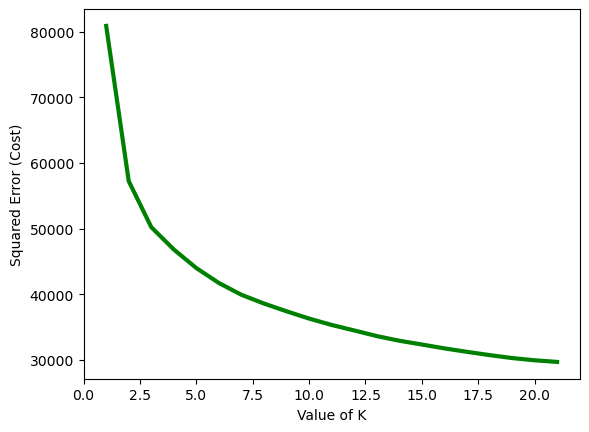

In [19]:
# Elbow method
# The Elbow method looks at the total within-cluster sum of square (WSS) as a function of the number of clusters.

cost =[]
for i in range(1, 22):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(pge_test_data)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 22), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot
 
# the point of the elbow is the
# most optimal value for choosing k

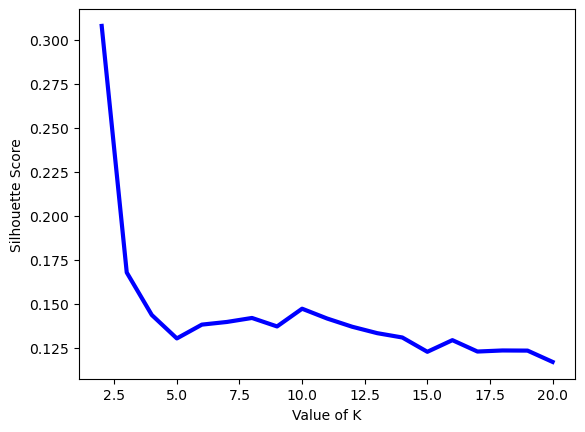

In [20]:
# Silhouette method
# The Silhouette method measures the quality of a clustering and determines how well each point lies within its cluster.

plt.plot(range(2, 21), s_scores, color ='b', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show()

In [21]:
pge_kmeans_model = KMeans(n_clusters = 3, random_state = 0) 
pge_kmeans_assignment = pge_kmeans_model.fit_predict(pge_test_data)

### Evaluation and Visualisation

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, v_measure_score
from sklearn.model_selection import KFold, train_test_split

* check out number of clusters/cluster assignment counts

In [23]:
print('Number of clusters from KMeans: %d'%(np.unique(pge_kmeans_assignment).shape[0]))

Number of clusters from KMeans: 3


In [24]:
pge_kmeans_counts = np.unique(pge_kmeans_assignment, return_counts = True)

In [25]:
print('Kmeans assignment counts')
pd.DataFrame({'Cluster Index': pge_kmeans_counts[0], 'Number of members':pge_kmeans_counts[1]}).set_index('Cluster Index')

Kmeans assignment counts


Number of members
Cluster Index                   
0                           1372
1                            875
2                           1753

* Assess goodness of fit by silhouette score and cluster homogeneities by V-measure

In [26]:
pge_kmeans_silhouette = silhouette_score(pge_test_data, pge_kmeans_assignment)
pge_kmeans_v_measure = v_measure_score(pge_test_label, pge_kmeans_assignment)
pge_pca_v=pge_kmeans_v_measure
pge_pca_s=pge_kmeans_silhouette
pd.DataFrame({'Metrics': ['silhouette', 'V-measure'], 'Kmeans': [pge_kmeans_silhouette, pge_kmeans_v_measure]}).set_index('Metrics')

Kmeans
Metrics             
silhouette  0.167842
V-measure   0.297208

* Visualise tissue type percentage in two different clustering configurations

In [27]:
def calculate_percent(sub_df, attrib):
    cnt = sub_df[attrib].count()
    output_sub_df = sub_df.groupby(attrib).count()
    return (output_sub_df/cnt)

In [28]:
pge_resulted_cluster_df = pd.DataFrame({'clusterID': pge_kmeans_assignment, 'type': pge_test_label})
pge_label_proportion_df = pge_resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pge_pivoted_label_proportion_df = pd.pivot_table(pge_label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = pge_resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pge_pivoted_label_proportion_df.index
(pge_pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans')

f.show()

C:\Users\Esha\AppData\Local\Temp\ipykernel_15804\2283898151.py:15: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



# ResNet50 PCA

C:\Users\Esha\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\Esha\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:489: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




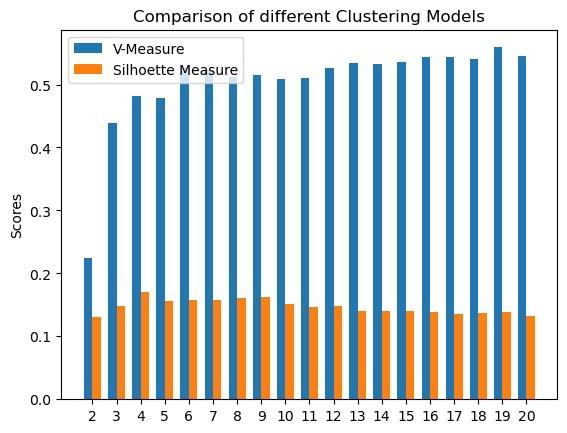

C:\Users\Esha\AppData\Local\Temp\ipykernel_15804\3834686230.py:106: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



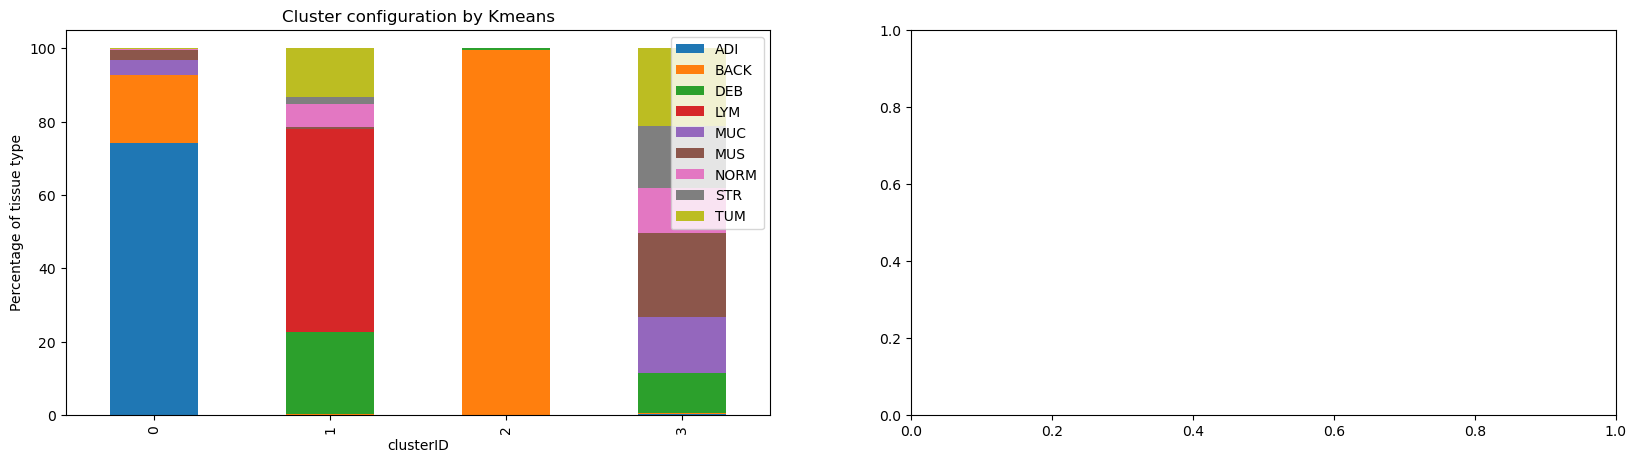

In [29]:
resnet50_filename  = np.squeeze(resnet50_content['file_name'])
resnet50_filename = np.array([str(x) for x in resnet50_filename])
resnet50_labels = np.array([x.split('/')[2] for x in resnet50_filename])
resnet50_labels

random.seed(0)
resnet50_selected_index = random.sample(list(np.arange(len(resnet50_pca_feature))), 4000)
resnet50_test_data = resnet50_pca_feature[resnet50_selected_index]
resnet50_test_label = resnet50_labels[resnet50_selected_index]

###########################################################################################################################
#EXPLORATORY ANALYSIS
resnet50_traces = []
for name in np.unique(resnet50_labels):
    trace = go.Scatter3d(
        x=pge_test_data[resnet50_test_label==name,0],
        y=pge_test_data[resnet50_test_label==name,1],
        z=pge_test_data[resnet50_test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    resnet50_traces.append(trace)


resnet50_data = go.Data(resnet50_traces)
resnet50_layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
resnet50_fig = go.Figure(data=resnet50_data, layout=resnet50_layout)
resnet50_fig.update_layout(
    title="First 3 pricipal components of ResNet50's PCA feature",
    legend_title="Legend Title",
)

resnet50_fig.show()

###########################################################################################################################
#MODEL TRAINING
v_scores = []
s_scores= []
N_Clusters = [2, 3, 4, 5, 6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
for i in range (2,21):
    resnet50_kmeans_model = KMeans(n_clusters = i, random_state = 0) #GaussianMixture(), AgglomerativeClustering(), Louvain
    resnet50_kmeans_assignment = resnet50_kmeans_model.fit_predict(resnet50_test_data)
    v_scores.append(v_measure_score(resnet50_test_label, resnet50_kmeans_assignment))
    s_scores.append(silhouette_score(resnet50_test_data, resnet50_kmeans_assignment))

x = np.arange(len(N_Clusters))  # the label locations
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, v_scores, width, label='V-Measure')
rects2 = ax.bar(x + width/2, s_scores, width, label='Silhoette Measure')
ax.set_ylabel('Scores')
ax.set_title('Comparison of different Clustering Models')
ax.set_xticks(x, N_Clusters)
ax.legend()
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
plt.show()

cost =[]
for i in range(1, 21):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(resnet50_test_data)
    cost.append(KM.inertia_)    
 
plt.plot(range(1, 21), cost, color ='g', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

plt.plot(range(2, 21), s_scores, color ='b', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show()
resnet50_kmeans_model = KMeans(n_clusters = 4, random_state = 0) 
resnet50_kmeans_assignment = resnet50_kmeans_model.fit_predict(resnet50_test_data)

###########################################################################################################################
#EVALUATION AND VISUALIZATION

resnet50_resulted_cluster_df = pd.DataFrame({'clusterID': resnet50_kmeans_assignment, 'type': resnet50_test_label})
resnet50_label_proportion_df = resnet50_resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
resnet50_pivoted_label_proportion_df = pd.pivot_table(resnet50_label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resnet50_resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = resnet50_pivoted_label_proportion_df.index
(resnet50_pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans')

f.show()

rn_pca_v=v_scores[2]
rn_pca_s=s_scores[2]


In [30]:
rn_pca_v
rn_pca_s

0.16967703

# PGE UMAP

C:\Users\Esha\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\Esha\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:489: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




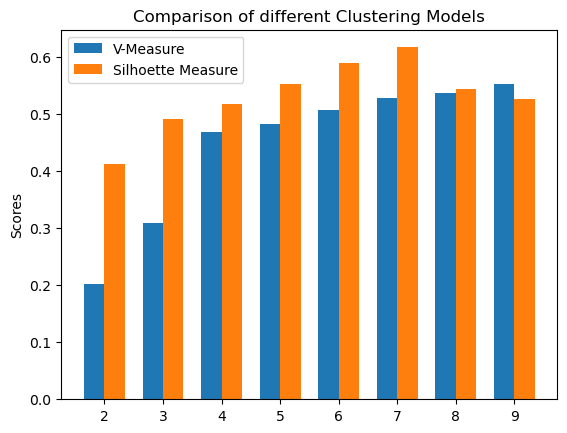

C:\Users\Esha\AppData\Local\Temp\ipykernel_15804\1482432146.py:107: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



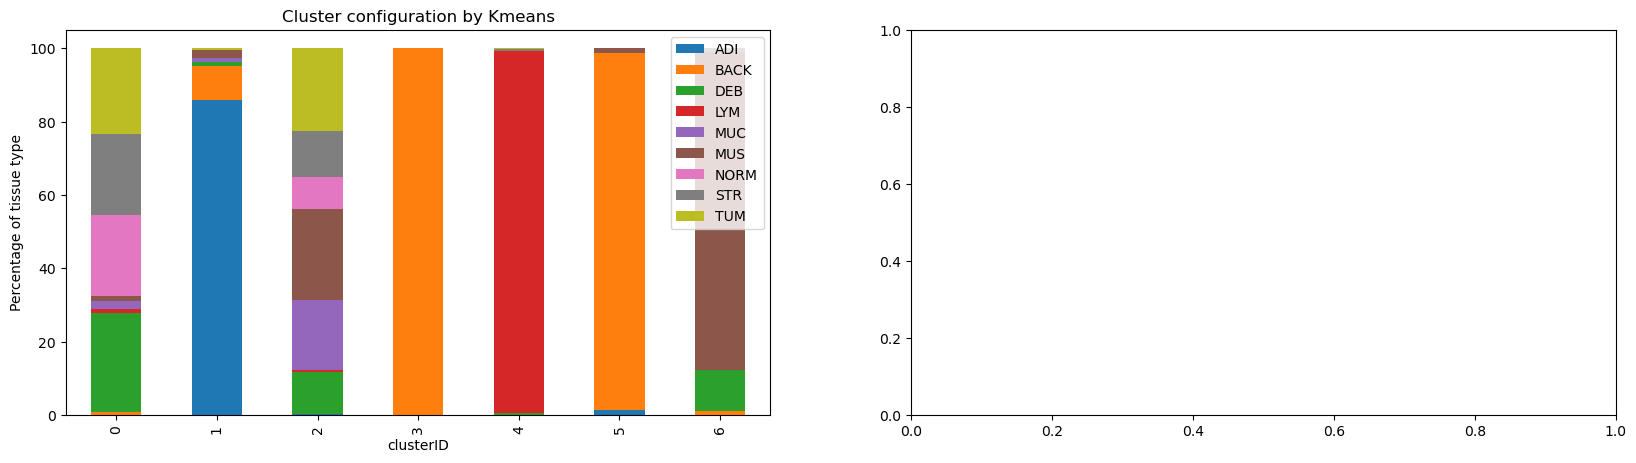

In [31]:
pge_filename  = np.squeeze(pge_content['file_name'])
pge_filename = np.array([str(x) for x in pge_filename])
pge_labels = np.array([x.split('/')[2] for x in pge_filename])
pge_labels

random.seed(0)
pge_selected_index = random.sample(list(np.arange(len(pge_umap_feature))), 4000)
pge_test_data = pge_umap_feature[pge_selected_index]
pge_test_label = pge_labels[pge_selected_index]

###########################################################################################################################
#EXPLORATORY ANALYSIS

pge_traces = []
for name in np.unique(pge_labels):
    trace = go.Scatter3d(
        x=pge_test_data[pge_test_label==name,0],
        y=pge_test_data[pge_test_label==name,1],
        z=pge_test_data[pge_test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    pge_traces.append(trace)


pge_data = go.Data(pge_traces)
pge_layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
pge_fig = go.Figure(data=pge_data, layout=pge_layout)
pge_fig.update_layout(
    title="First 3 pricipal components of PathologyGAN's UMAP feature",
    legend_title="Legend Title",
)

pge_fig.show()

###########################################################################################################################
#MODEL TRAINING

v_scores = []
s_scores=[]  
N_Clusters = [2, 3, 4, 5, 6,7,8,9]
for i in range (2,10):
    pge_kmeans_model = KMeans(n_clusters = i, random_state = 0) #GaussianMixture(), AgglomerativeClustering(), Louvain
    pge_kmeans_assignment = pge_kmeans_model.fit_predict(pge_test_data)
    v_scores.append(v_measure_score(pge_test_label, pge_kmeans_assignment))
    s_scores.append(silhouette_score(pge_test_data, pge_kmeans_assignment))

x = np.arange(len(N_Clusters))  # the label locations
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, v_scores, width, label='V-Measure')
rects2 = ax.bar(x + width/2, s_scores, width, label='Silhoette Measure')
ax.set_ylabel('Scores')
ax.set_title('Comparison of different Clustering Models')
ax.set_xticks(x, N_Clusters)
ax.legend()
plt.show()

cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(pge_test_data)
    cost.append(KM.inertia_)    
 
plt.plot(range(1, 11), cost, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() 

plt.plot(range(2, 10), s_scores, color ='b', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show()

pge_kmeans_model = KMeans(n_clusters = 7, random_state = 0) 
pge_kmeans_assignment = pge_kmeans_model.fit_predict(pge_test_data)

###########################################################################################################################
#EVALUATION AND VISUALIZATION

pge_resulted_cluster_df = pd.DataFrame({'clusterID': pge_kmeans_assignment, 'type': pge_test_label})
pge_label_proportion_df = pge_resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
pge_pivoted_label_proportion_df = pd.pivot_table(pge_label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = pge_resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = pge_pivoted_label_proportion_df.index
(pge_pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans')

f.show()

pge_umap_s = silhouette_score(pge_test_data, pge_kmeans_assignment)
pge_umap_v = v_measure_score(pge_test_label, pge_kmeans_assignment)

# ResNet50 UMAP

C:\Users\Esha\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:31: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.


C:\Users\Esha\anaconda3\lib\site-packages\plotly\graph_objs\_deprecations.py:489: DeprecationWarning:

plotly.graph_objs.Scene is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.layout.Scene




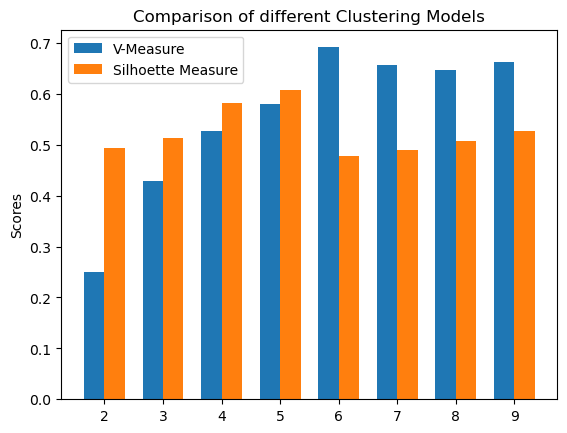

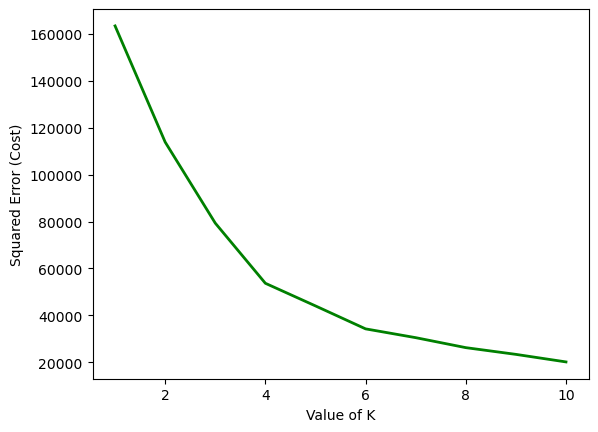

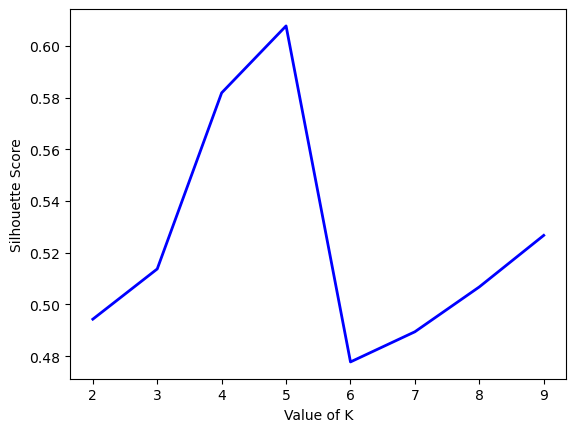

C:\Users\Esha\AppData\Local\Temp\ipykernel_15804\768879347.py:106: UserWarning:

Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.



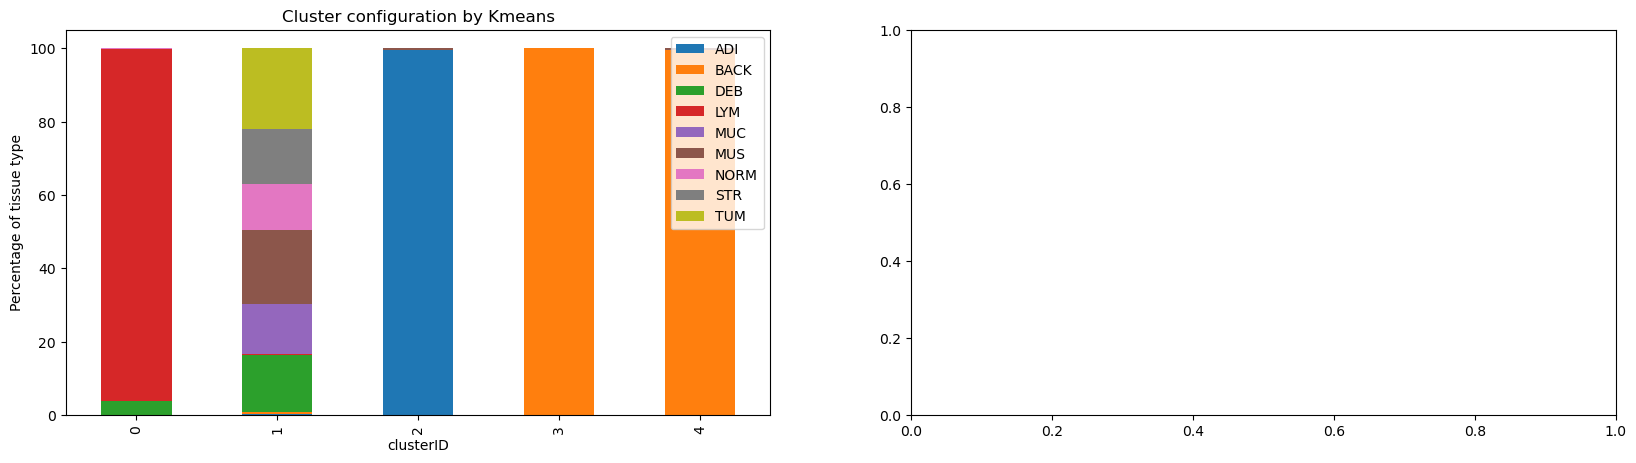

In [32]:
resnet50_filename  = np.squeeze(resnet50_content['file_name'])
resnet50_filename = np.array([str(x) for x in resnet50_filename])
resnet50_labels = np.array([x.split('/')[2] for x in resnet50_filename])
resnet50_labels

random.seed(0)
resnet50_selected_index = random.sample(list(np.arange(len(resnet50_umap_feature))), 4000)
resnet50_test_data = resnet50_umap_feature[resnet50_selected_index]
resnet50_test_label = resnet50_labels[resnet50_selected_index]

###########################################################################################################################
#EXPLORATORY ANALYSIS
resnet50_traces = []
for name in np.unique(resnet50_labels):
    trace = go.Scatter3d(
        x=pge_test_data[resnet50_test_label==name,0],
        y=pge_test_data[resnet50_test_label==name,1],
        z=pge_test_data[resnet50_test_label==name,2],
        mode='markers',
        name=name,
        marker=go.scatter3d.Marker(
            size=4,
            opacity=0.8
        )

    )
    resnet50_traces.append(trace)


resnet50_data = go.Data(resnet50_traces)
resnet50_layout = go.Layout(
            showlegend=True,
    scene=go.Scene(
                xaxis=go.layout.scene.XAxis(title='PC1'),
                yaxis=go.layout.scene.YAxis(title='PC2'),
                zaxis=go.layout.scene.ZAxis(title='PC3')
                )
)
resnet50_fig = go.Figure(data=resnet50_data, layout=resnet50_layout)
resnet50_fig.update_layout(
    title="First 3 pricipal components of ResNet50's UMAP feature",
    legend_title="Legend Title",
)

resnet50_fig.show()

###########################################################################################################################
#MODEL TRAINING
v_scores = []
s_scores= []
N_Clusters = [2, 3, 4, 5, 6,7,8,9]
for i in range (2,10):
    resnet50_kmeans_model = KMeans(n_clusters = i, random_state = 0) #GaussianMixture(), AgglomerativeClustering(), Louvain
    resnet50_kmeans_assignment = resnet50_kmeans_model.fit_predict(resnet50_test_data)
    v_scores.append(v_measure_score(resnet50_test_label, resnet50_kmeans_assignment))
    s_scores.append(silhouette_score(resnet50_test_data, resnet50_kmeans_assignment))

x = np.arange(len(N_Clusters))  # the label locations
width = 0.35
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, v_scores, width, label='V-Measure')
rects2 = ax.bar(x + width/2, s_scores, width, label='Silhoette Measure')
ax.set_ylabel('Scores')
ax.set_title('Comparison of different Clustering Models')
ax.set_xticks(x, N_Clusters)
ax.legend()
# ax.bar_label(rects1, padding=3)
# ax.bar_label(rects2, padding=3)
plt.show()

cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(resnet50_test_data)
    cost.append(KM.inertia_)    
 
plt.plot(range(1, 11), cost, color ='g', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show()

plt.plot(range(2, 10), s_scores, color ='b', linewidth ='2')
plt.xlabel("Value of K")
plt.ylabel("Silhouette Score")
plt.show()
resnet50_kmeans_model = KMeans(n_clusters = 5, random_state = 0) 
resnet50_kmeans_assignment = resnet50_kmeans_model.fit_predict(resnet50_test_data)

###########################################################################################################################
#EVALUATION AND VISUALIZATION

resnet50_resulted_cluster_df = pd.DataFrame({'clusterID': resnet50_kmeans_assignment, 'type': resnet50_test_label})
resnet50_label_proportion_df = resnet50_resulted_cluster_df.groupby(['clusterID']).apply(lambda x: calculate_percent(x,'type')).rename(columns={'clusterID':'type_occurrence_percentage'}).reset_index()
resnet50_pivoted_label_proportion_df = pd.pivot_table(resnet50_label_proportion_df, index = 'clusterID', columns = 'type', values = 'type_occurrence_percentage')


f, axes = plt.subplots(1, 2, figsize=(20,5))
number_of_tile_df = resnet50_resulted_cluster_df.groupby('clusterID')['type'].count().reset_index().rename(columns={'type':'number_of_tile'})
df_idx = resnet50_pivoted_label_proportion_df.index
(resnet50_pivoted_label_proportion_df*100).loc[df_idx].plot.bar(stacked=True, ax = axes[0] )

axes[0].set_ylabel('Percentage of tissue type')
axes[0].legend(loc='upper right')
axes[0].set_title('Cluster configuration by Kmeans')

f.show()

rn_umap_v=v_scores[3]
rn_umap_s=s_scores[3]

In [33]:
pd.DataFrame({'Metrics': ['silhouette', 'V-measure','K'], 'PGE PCA Kmeans': [pge_pca_s, pge_pca_v,'3'], 'ResNet50 PCA Kmeans': [rn_pca_s, rn_pca_v,'4'], 'PGE UMAP Kmeans': [pge_umap_s, pge_umap_v,'7'], 'ResNet50 UMAP Kmeans': [rn_umap_s, rn_umap_v,'5']}).set_index('Metrics')

PGE PCA Kmeans ResNet50 PCA Kmeans PGE UMAP Kmeans  \
Metrics                                                         
silhouette       0.167842            0.169677        0.617289   
V-measure        0.297208            0.481603        0.528095   
K                       3                   4               7   

           ResNet50 UMAP Kmeans  
Metrics                          
silhouette              0.60773  
V-measure               0.57946  
K                             5